In [14]:
import pandas as pd

import matplotlib.pyplot as plt


from bs4 import BeautifulSoup
import datetime


In [38]:
BeautifulSoup(tweets['content'][0]).find('span', {'class': 'username'}).find('b').content

In [92]:
def extract_content(row):
    try:
        soup = BeautifulSoup(row['content']).find('p', {'class':'tweet-text'})
        for tag in soup(["img", "a"]):
            tag.decompose()
        return ' '.join(soup.contents)
    except:
        # tweet is deleted
        return None

def extract_date(row):
    try:
        return BeautifulSoup(row['content']).find('span', {'class': '_timestamp'})['data-time']
    except:
        # tweet is deleted
        return None

def extract_username(row):
    try:
        return BeautifulSoup(row['content']).find('span', {'class': 'username'}).find('b').content
    except:
        # tweet is deleted
        return None

In [100]:
def convert_file(filename):
    tweets = pd.read_csv(f'{filename}.csv')
    tweets['tweet'] = tweets.apply(lambda row: extract_content(row), axis=1)
    tweets['date'] = tweets.apply(lambda row: extract_date(row), axis=1)
    tweets['username'] = tweets.apply(lambda row: extract_username(row), axis=1)
    extracted_tweets = tweets[['id', 'tweet', 'date', 'username']]
    extracted_tweets.to_csv(f'good/extracted/{filename}.csv')

In [103]:
for i in range(99, 30400, 100):
    convert_file(f'tweets_{i}')
    print(i)
convert_file('tweets_30472')

99
199
299
399
499
599
699
799
899
999
1099
1199
1299
1399
1499
1599
1699
1799
1899
1999
2099
2199
2299
2399
2499
2599
2699
2799
2899
2999
3099
3199
3299
3399
3499
3599
3699
3799
3899
3999
4099
4199
4299
4399
4499
4599
4699
4799
4899
4999
5099
5199
5299
5399
5499
5599
5699
5799
5899
5999
6099
6199
6299
6399
6499
6599
6699
6799
6899
6999
7099
7199
7299
7399
7499
7599
7699
7799
7899
7999
8099
8199
8299
8399
8499
8599
8699
8799
8899
8999
9099
9199
9299
9399
9499
9599
9699
9799
9899
9999
10099
10199
10299
10399
10499
10599
10699
10799
10899
10999
11099
11199
11299
11399
11499
11599
11699
11799
11899
11999
12099
12199
12299
12399
12499
12599
12699
12799
12899
12999
13099
13199
13299
13399
13499
13599
13699
13799
13899
13999
14099
14199
14299
14399
14499
14599
14699
14799
14899
14999
15099
15199
15299
15399
15499
15599
15699
15799
15899
15999
16099
16199
16299
16399
16499
16599
16699
16799
16899
16999
17099
17199
17299
17399
17499
17599
17699
17799
17899
17999
18099
18199
18299
18399
18499
1

In [104]:
convert_file('tweets_30472')

In [108]:
all_tweets = pd.DataFrame()
for i in list(range(99, 30400, 100)) + [30472]:
    partial_tweets = pd.read_csv(f'good/extracted/tweets_{i}.csv')
    all_tweets = all_tweets.append(partial_tweets)
all_tweets.to_csv('good/extracted/all_tweets.csv')

In [6]:
def convert_date(row):
    try:
        return datetime.date.fromtimestamp(row['date'])
    except:
        return None

all_tweets['datetime'] = all_tweets.apply(lambda row: convert_date(row), axis=1)

In [8]:
all_tweets.index = pd.to_datetime(all_tweets['datetime'])
print(all_tweets)

                             id  \
datetime                          
2018-01-31   958752357420060672   
2018-01-31   958760941419626497   
2018-01-31   958762932443205632   
2018-01-31   958768907560669184   
2018-01-31   958770805151797249   
...                         ...   
NaT         1230619126885994501   
2020-02-20  1230622976242044933   
2020-02-19  1230624185656979456   
2020-02-20  1230624189813592065   
2020-02-20  1230628431936749573   

                                                        tweet          date  \
datetime                                                                      
2018-01-31  Er een   gestart voor support aan   Den Haag d...  1.517419e+09   
2018-01-31  Er een   gestart voor support aan   Den Haag d...  1.517419e+09   
2018-01-31  Er een   gestart voor support aan   Den Haag d...  1.517419e+09   
2018-01-31  Zeventig boeren uit   willen naar Den Haag kom...  1.517423e+09   
2018-01-31  Zeventig boeren uit   willen naar Den Haag kom...  1.51742

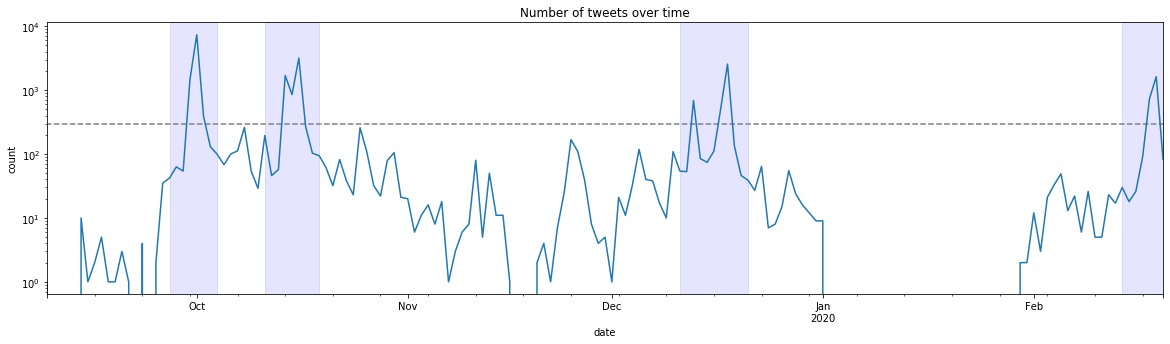

In [28]:
# all_tweets = pd.read_csv('good/extracted/all_tweets.csv')

ax = all_tweets[all_tweets['datetime']>datetime.date(2019,9,1)].groupby(pd.Grouper(freq='d')).count()['id'].plot(title='Number of tweets over time', figsize=(20, 5), logy=True)
ax.set_xlabel("date")
ax.set_ylabel("count")
plt.axvspan(datetime.date(2019,9,27), datetime.date(2019,10,4), color='b', alpha=0.1)
plt.axvspan(datetime.date(2019,10,11), datetime.date(2019,10,19), color='b', alpha=0.1)
plt.axvspan(datetime.date(2019,12,11), datetime.date(2019,12,21), color='b', alpha=0.1)
plt.axvspan(datetime.date(2020,2,14), datetime.date(2020,4,2), color='b', alpha=0.1)
plt.hlines(300, datetime.date(2000,9,27), datetime.date(2119,9,27), color='grey', linestyle='dashed')

In [5]:
all_tweets['character_count'] = all_tweets['tweet'].str.len()
all_tweets['word_count'] = all_tweets['tweet'].str.split().str.len()

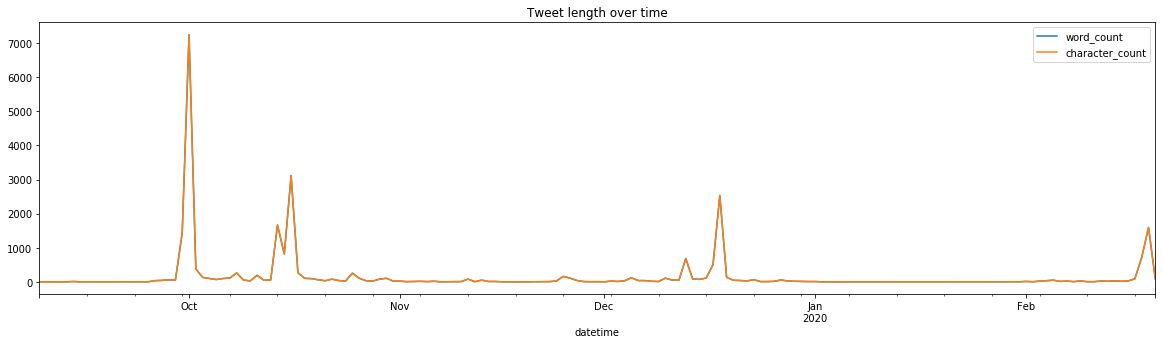

In [169]:
all_tweets[all_tweets['datetime']>datetime.date(2019,9,1)].groupby(pd.Grouper(freq='d')).count()[['word_count', 'character_count']].plot(title='Tweet length over time', figsize=(20, 5))

In [174]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

counted_words = cv.fit_transform(all_tweets['tweet'].fillna(''))
counted_words = pd.DataFrame(counted_words.todense(), columns=cv.get_feature_names())

In [177]:
counted_words

,00,000,000kg,000s,007,01,010,02,020,024,...,बजन,रत,षम,おいしくいただきました,かわいいはぴじ氏です,とんこつラーメンだいえい,全国旅するぬいぐるみ,東洋軒です,福岡県大牟田市で,豚骨ラーメン
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
counted_words.sum(axis=0).sort_values(ascending=False).nlargest(50)

de         17972
het        11092
boeren      7867
en          7657
in          7263
van         6803
op          5835
een         5504
is          4559
voor        4185
niet        3585
met         3479
dat         3357
zijn        3254
te          3010
ook         2804
bij         2624
ik          2530
naar        2511
die         2500
je          2458
er          2433
den         2159
maar        2137
om          2062
haag        2051
ze          2050
aan         1974
the         1919
door        1848
wat         1774
nu          1621
we          1604
onze        1587
dit         1578
over        1495
of          1434
als         1403
zo          1319
al          1285
nog         1268
dan         1245
uit         1233
farmers     1197
hebben      1145
to          1110
wel         1096
hun         1093
tegen       1085
jullie      1082
dtype: int64

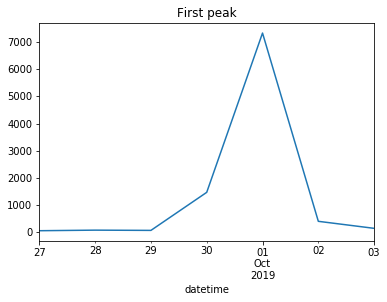

In [197]:
peak_1.groupby(pd.Grouper(freq='d')).count()['id'].plot(title='First peak')

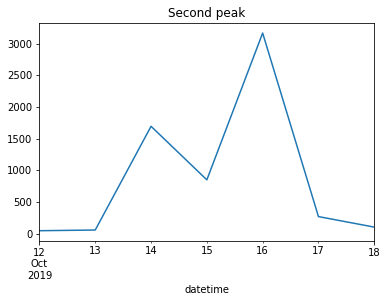

In [198]:
peak_2.groupby(pd.Grouper(freq='d')).count()['id'].plot(title='Second peak')

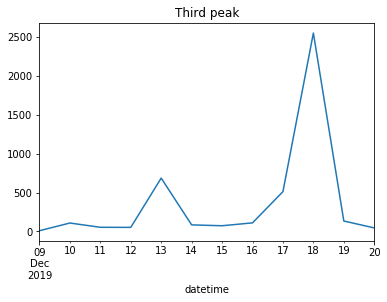

In [199]:
peak_3.groupby(pd.Grouper(freq='d')).count()['id'].plot(title='Third peak')

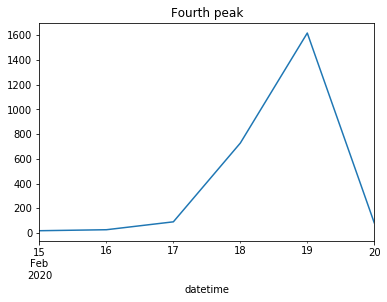

In [200]:
peak_4.groupby(pd.Grouper(freq='d')).count()['id'].plot(title='Fourth peak')

In [201]:
cv = CountVectorizer()
counted_words_1 = cv.fit_transform(peak_1['tweet'].fillna(''))
counted_words_1 = pd.DataFrame(counted_words_1.todense(), columns=cv.get_feature_names())

cv = CountVectorizer()
counted_words_2 = cv.fit_transform(peak_2['tweet'].fillna(''))
counted_words_2 = pd.DataFrame(counted_words_2.todense(), columns=cv.get_feature_names())

cv = CountVectorizer()
counted_words_3 = cv.fit_transform(peak_3['tweet'].fillna(''))
counted_words_3 = pd.DataFrame(counted_words_3.todense(), columns=cv.get_feature_names())

cv = CountVectorizer()
counted_words_4 = cv.fit_transform(peak_4['tweet'].fillna(''))
counted_words_4 = pd.DataFrame(counted_words_4.todense(), columns=cv.get_feature_names())

In [202]:
counted_words_1.sum(axis=0).sort_values(ascending=False).nlargest(50)

de           5405
het          3819
boeren       2723
van          2216
en           2070
op           1968
in           1945
een          1618
is           1433
voor         1280
dat          1181
ook          1119
naar         1058
niet         1034
met          1030
zijn         1000
the           886
den           871
onze          858
haag          855
maar          835
ik            829
er            828
bij           801
ze            748
je            722
te            718
om            700
die           657
wat           621
we            606
door          576
of            557
farmers       536
jullie        526
nu            501
malieveld     495
to            490
hebben        483
aan           448
wel           421
al            421
nog           416
als           410
vandaag       391
dit           391
zo            381
steun         373
over          370
gaat          364
dtype: int64

In [203]:
counted_words_2.sum(axis=0).sort_values(ascending=False).nlargest(50)

de           4050
het          2697
en           2030
in           2005
boeren       1807
van          1385
een          1372
op           1224
is           1037
voor          968
niet          792
te            725
zijn          725
bij           707
met           698
ik            607
je            600
ook           576
den           568
dat           564
die           563
haag          555
the           547
aan           512
naar          494
er            479
door          442
om            417
nu            398
maar          388
al            362
of            360
ze            341
wat           329
to            320
dan           318
als           308
dit           301
over          287
groningen     285
uit           285
nog           280
wordt         255
trekkers      246
zo            246
richting      244
farmers       240
onderweg      239
tegen         234
weer          221
dtype: int64

In [204]:
counted_words_3.sum(axis=0).sort_values(ascending=False).nlargest(50)

de           4203
het          1725
en           1619
boeren       1512
van          1483
in           1382
op           1292
een          1209
is            978
niet          935
met           849
voor          813
zijn          776
te            737
dat           708
die           684
er            640
je            590
ik            581
ze            538
wat           534
aan           528
maar          518
bij           475
over          456
door          447
dit           424
om            413
ook           390
naar          389
we            360
nu            349
hun           348
worden        337
zo            324
hebben        300
deze          293
boer          286
als           282
geen          274
nog           268
heeft         237
onze          235
nederland     234
veel          232
dan           225
uit           222
vandaag       219
meer          218
weer          218
dtype: int64

In [205]:
counted_words_4.sum(axis=0).sort_values(ascending=False).nlargest(50)

de          1790
het         1207
en           841
in           814
boeren       803
van          679
op           642
een          584
voor         570
is           473
den          406
dat          399
haag         397
niet         388
te           357
zijn         341
naar         336
ook          333
met          329
die          274
je           271
om           263
ik           256
er           233
dit          233
ze           228
bij          223
maar         218
als          210
nu           197
door         184
we           180
aan          172
uit          169
onze         167
al           164
nog          159
wordt        156
deze         156
zo           153
mensen       149
hun          141
over         140
tegen        139
politie      137
trekkers     133
jullie       133
via          132
wel          128
gaat         125
dtype: int64

In [214]:
# Same without stop words
from stop_words import get_stop_words

stop_words = get_stop_words('nl')

cv = CountVectorizer(stop_words=stop_words)
counted_words = cv.fit_transform(all_tweets['tweet'].fillna(''))
counted_words = pd.DataFrame(counted_words.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(stop_words=stop_words)
counted_words_1 = cv.fit_transform(peak_1['tweet'].fillna(''))
counted_words_1 = pd.DataFrame(counted_words_1.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(stop_words=stop_words)
counted_words_2 = cv.fit_transform(peak_2['tweet'].fillna(''))
counted_words_2 = pd.DataFrame(counted_words_2.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(stop_words=stop_words)
counted_words_3 = cv.fit_transform(peak_3['tweet'].fillna(''))
counted_words_3 = pd.DataFrame(counted_words_3.todense(), columns=cv.get_feature_names())

cv = CountVectorizer(stop_words=stop_words)
counted_words_4 = cv.fit_transform(peak_4['tweet'].fillna(''))
counted_words_4 = pd.DataFrame(counted_words_4.todense(), columns=cv.get_feature_names())

counted_words.sum(axis=0).sort_values(ascending=False).nlargest(50)

boeren       7867
den          2159
haag         2051
the          1919
we           1604
onze         1587
farmers      1197
to           1110
wel          1096
jullie       1082
vandaag       975
gaat          963
nederland     950
weer          943
komen         893
gaan          886
steun         884
trekkers      878
malieveld     800
boer          770
mensen        753
politie       731
protest       721
richting      679
laat          668
onderweg      663
heel          649
land          603
weg           601
wij           599
staan         576
moeten        573
via           559
alle          553
tractoren     533
dutch         513
even          507
rijden        502
morgen        496
goed          486
staat         484
mee           472
overheid      467
geweldig      455
zien          435
willen        423
achter        419
tijdens       415
actie         406
massaal       405
dtype: int64

In [215]:
counted_words_1.sum(axis=0).sort_values(ascending=False).nlargest(50)

boeren         2723
the             886
den             871
onze            858
haag            855
we              606
farmers         536
jullie          526
malieveld       495
to              490
wel             421
vandaag         391
steun           373
gaat            364
geweldig        355
komen           347
nederland       336
protest         333
dutch           323
school          291
weer            289
against         280
politie         271
laat            270
cns             267
protestmars     267
moeten          256
trekkers        252
rijden          243
gaan            242
mensen          240
heel            232
richting        208
weg             204
tijdens         200
wij             199
staan           197
blijven         196
tractoren       193
steunt          191
toe             184
mooi            183
politici        182
trots           181
on              178
massaal         177
nieuwe          175
staat           172
morgen          171
even            169


In [216]:
counted_words_2.sum(axis=0).sort_values(ascending=False).nlargest(50)

boeren           1807
den               568
haag              555
the               547
to                320
groningen         285
trekkers          246
richting          244
farmers           240
onderweg          239
weer              221
malieveld         209
gaat              204
provinciehuis     203
we                198
wel               187
utrecht           186
gaan              185
nederland         180
onze              178
vandaag           177
land              176
boer              168
leger             162
komen             160
government        159
af                152
wij               151
politie           151
jullie            151
grote             149
weg               148
elkaar            145
heel              144
binnenhof         138
help              136
drenthe           135
support           132
burgers           132
netherlands       131
alle              130
co2               130
you               129
huge              128
even              127
half      

In [218]:
counted_words_3.sum(axis=0).sort_values(ascending=False).nlargest(50)

boeren        1512
we             360
boer           286
onze           235
nederland      234
vandaag        219
weer           218
wel            216
mensen         205
farmers        199
jullie         198
the            186
steun          183
komen          180
to             176
overheid       174
gaan           167
geven          162
heel           158
staan          157
den            146
kijk           144
willen         141
trekkers       137
land           136
hele           132
graag          128
18             126
protest        124
weg            123
moeten         122
wanneer        120
duitse         117
alleen         116
haag           116
rutte          116
actie          116
wij            115
goed           113
aangemaakt     112
politie        112
bouwers        112
even           111
and            111
laat           111
gaat           109
grote          108
staat          107
nl             106
mee            104
dtype: int64

In [219]:
counted_words_4.sum(axis=0).sort_values(ascending=False).nlargest(50)

boeren       803
den          406
haag         397
we           180
onze         167
mensen       149
politie      137
trekkers     133
jullie       133
via          132
wel          128
gaat         125
steun        122
gaan         117
the          117
weer         115
morgen       113
onderweg     112
komen        104
land          98
alle          97
boer          93
laat          92
vandaag       91
natuur        88
weg           83
rijden        80
farmers       78
daarom        78
nederland     77
laten         77
echt          73
landbouw      73
wij           72
eigen         70
goed          70
snelweg       69
minder        69
mee           68
zien          68
bestaan       67
vechten       65
succes        65
even          65
overheid      63
actie         63
gewone        62
vissers       62
binnenhof     62
zet           62
dtype: int64